In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [10]:
# Load data from CSV file
data = pd.read_csv("/workspaces/codespaces-jupyter/data/ML Dataset/Iris.csv")

In [11]:
# Print the loaded data
print(data)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
0      1            5.1           3.5            1.4           0.2   
1      2            4.9           3.0            1.4           0.2   
2      3            4.7           3.2            1.3           0.2   
3      4            4.6           3.1            1.5           0.2   
4      5            5.0           3.6            1.4           0.2   
..   ...            ...           ...            ...           ...   
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
0       Iris-setosa  
1       Iris-setosa  
2       Iris-setosa  
3       Iris-setosa  
4       Iris-setosa  
..              ...  
145  

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [14]:
duplicates = data.duplicated()
print(duplicates)

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool


In [15]:
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


<Axes: >

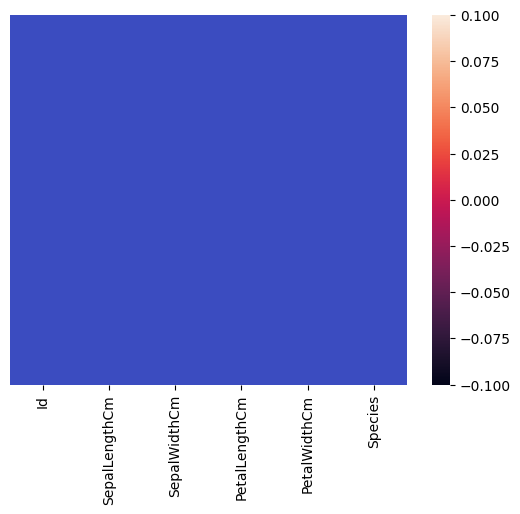

In [16]:
sns.heatmap(data.isnull(),yticklabels=False)
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='coolwarm')

In [17]:
data2 = data
data['SepalLengthCm'] = data['SepalLengthCm'].fillna(data['SepalLengthCm'].mean())
print(data.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [18]:
print(data2['PetalWidthCm'].unique())
print(data2['PetalWidthCm'].value_counts())

[0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
0.2    28
1.3    13
1.8    12
1.5    12
1.4     8
2.3     8
1.0     7
0.4     7
0.3     7
0.1     6
2.1     6
2.0     6
1.2     5
1.9     5
1.6     4
2.5     3
2.2     3
2.4     3
1.1     3
1.7     2
0.6     1
0.5     1
Name: PetalWidthCm, dtype: int64


In [21]:
data2 = data2.drop(columns=['PetalWidthCm'])
print(data2.isnull().sum())

Id               0
SepalLengthCm    0
PetalLengthCm    0
Species          0
dtype: int64


In [22]:
# data2.Species.fillna(data2.Species.mode, inplace=True)
print(data2['Species'].unique())
data2.dropna(subset=['Species'], inplace=True)
print(data2.isnull().sum())
print(data2['Species'].unique())
data2['Species'].value_counts()

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Id               0
SepalLengthCm    0
PetalLengthCm    0
Species          0
dtype: int64
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [23]:
one_hot_encoded_data_Species = pd.get_dummies(data2, columns=(['Species']))
print(one_hot_encoded_data_Species)

      Id  SepalLengthCm  PetalLengthCm  Species_Iris-setosa  \
0      1            5.1            1.4                    1   
1      2            4.9            1.4                    1   
2      3            4.7            1.3                    1   
3      4            4.6            1.5                    1   
4      5            5.0            1.4                    1   
..   ...            ...            ...                  ...   
145  146            6.7            5.2                    0   
146  147            6.3            5.0                    0   
147  148            6.5            5.2                    0   
148  149            6.2            5.4                    0   
149  150            5.9            5.1                    0   

     Species_Iris-versicolor  Species_Iris-virginica  
0                          0                       0  
1                          0                       0  
2                          0                       0  
3                      

In [25]:
print(data2['Id'].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150]


In [27]:
one_hot_encoded_data_SepalLengthCm = pd.get_dummies(data2, columns=(['SepalLengthCm']))
print(one_hot_encoded_data_SepalLengthCm)

      Id  PetalLengthCm         Species  SepalLengthCm_4.3  SepalLengthCm_4.4  \
0      1            1.4     Iris-setosa                  0                  0   
1      2            1.4     Iris-setosa                  0                  0   
2      3            1.3     Iris-setosa                  0                  0   
3      4            1.5     Iris-setosa                  0                  0   
4      5            1.4     Iris-setosa                  0                  0   
..   ...            ...             ...                ...                ...   
145  146            5.2  Iris-virginica                  0                  0   
146  147            5.0  Iris-virginica                  0                  0   
147  148            5.2  Iris-virginica                  0                  0   
148  149            5.4  Iris-virginica                  0                  0   
149  150            5.1  Iris-virginica                  0                  0   

     SepalLengthCm_4.5  Sep